In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
purchase = pd.read_csv("QVI_purchase_behaviour.csv")                    

In [4]:
purchase.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


In [4]:
purchase.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72637 entries, 0 to 72636
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   LYLTY_CARD_NBR    72637 non-null  int64 
 1   LIFESTAGE         72637 non-null  object
 2   PREMIUM_CUSTOMER  72637 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


There is no null value in the dataset.

In [5]:
purchase['LYLTY_CARD_NBR'].nunique()

72637

There is no duplicate value in card numbers.

In [6]:
purchase['LIFESTAGE'].unique()

array(['YOUNG SINGLES/COUPLES', 'YOUNG FAMILIES', 'OLDER SINGLES/COUPLES',
       'MIDAGE SINGLES/COUPLES', 'NEW FAMILIES', 'OLDER FAMILIES',
       'RETIREES'], dtype=object)

This category looks good.

In [7]:
purchase['PREMIUM_CUSTOMER'].unique()

array(['Premium', 'Mainstream', 'Budget'], dtype=object)

This category looks good.

In [8]:
grouped = purchase.groupby('PREMIUM_CUSTOMER')['LIFESTAGE'].value_counts().reset_index()

In [9]:
grouped

,PREMIUM_CUSTOMER,LIFESTAGE,count
0,Budget,OLDER SINGLES/COUPLES,4929
1,Budget,OLDER FAMILIES,4675
2,Budget,RETIREES,4454
3,Budget,YOUNG FAMILIES,4017
4,Budget,YOUNG SINGLES/COUPLES,3779
5,Budget,MIDAGE SINGLES/COUPLES,1504
6,Budget,NEW FAMILIES,1112
7,Mainstream,YOUNG SINGLES/COUPLES,8088
8,Mainstream,RETIREES,6479
9,Mainstream,OLDER SINGLES/COUPLES,4930


In [10]:
pivot = (
    grouped.pivot_table(
        index="PREMIUM_CUSTOMER",
        columns="LIFESTAGE",
        values="count",
        aggfunc="sum",
        fill_value=0
    )
)

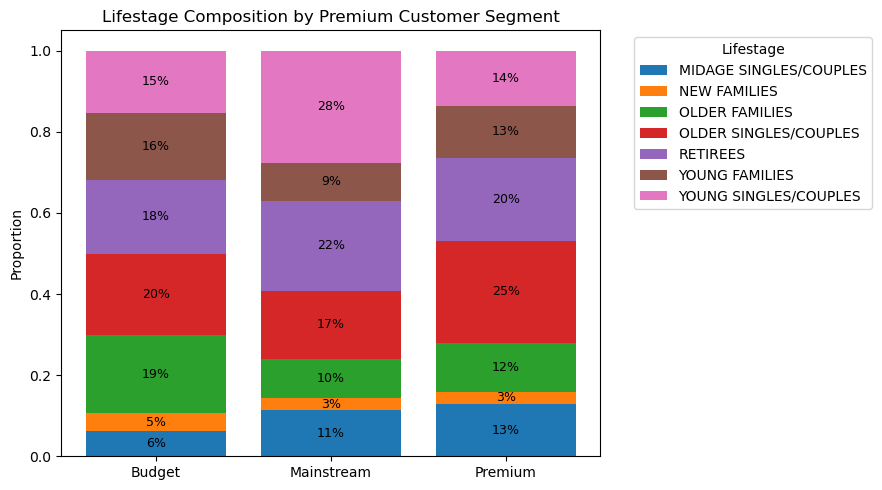

In [11]:
pivot_pct = pivot.div(pivot.sum(axis=1), axis=0)

plt.figure(figsize=(9, 5))

bottom = pd.Series(0, index=pivot_pct.index)

for col in pivot_pct.columns:
    bars = plt.bar(
        pivot_pct.index,
        pivot_pct[col],
        bottom=bottom,
        label=col
    )

    # ---- add percentage labels ----
    for i, value in enumerate(pivot_pct[col]):
        plt.text(
            i,
            bottom.iloc[i] + value / 2,
            f"{value:.0%}",
            ha="center",
            va="center",
            fontsize=9
        )

    bottom += pivot_pct[col]

plt.ylabel("Proportion")
plt.title("Lifestage Composition by Premium Customer Segment")
plt.legend(title="Lifestage", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()


Top 3 budget comsumers: older singles/couples, older families, retirees (older demographic)

Top 3 mainstream consumers: young singles/couples, retirees, older singles/couples (no dependent)

Top 3 premium consumers: older singles/couples, retirees, young singles/couples (same as mainstream, no dependent but maybe higher income)

In [5]:
transaction = pd.read_excel("QVI_transaction_data.xlsx")     

In [13]:
transaction['DATE'] = pd.to_datetime(transaction['DATE'], unit="D", origin="1899-12-30")

In [14]:
transaction.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [15]:
transaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   DATE            264836 non-null  datetime64[ns]
 1   STORE_NBR       264836 non-null  int64         
 2   LYLTY_CARD_NBR  264836 non-null  int64         
 3   TXN_ID          264836 non-null  int64         
 4   PROD_NBR        264836 non-null  int64         
 5   PROD_NAME       264836 non-null  object        
 6   PROD_QTY        264836 non-null  int64         
 7   TOT_SALES       264836 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(5), object(1)
memory usage: 16.2+ MB


In [16]:
transaction['STORE_NBR'].nunique()

272

There is no null value in the dataset.

In [17]:
transaction['LYLTY_CARD_NBR'].nunique()

72637

There are more transactions than members. This means that there are multiple-pack buyers.

In [18]:
transaction['PROD_NBR'].nunique()

114

In [19]:
transaction['PROD_NAME'].nunique()

114

No anomaly in terms of products' names and numbers.

In [20]:
transaction[['PROD_QTY', 'TOT_SALES']].describe()

,PROD_QTY,TOT_SALES
count,264836.000000,264836.000000
mean,1.907309,7.304200
std,0.643654,3.083226
min,1.000000,1.500000
25%,2.000000,5.400000
50%,2.000000,7.400000
75%,2.000000,9.200000
max,200.000000,650.000000


In [21]:
transaction[transaction['PROD_QTY'] == 200]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
69762,2018-08-19,226,226000,226201,4,Dorito Corn Chp Supreme 380g,200,650.0
69763,2019-05-20,226,226000,226210,4,Dorito Corn Chp Supreme 380g,200,650.0


Examine the outliers, just 2 bulk orders.

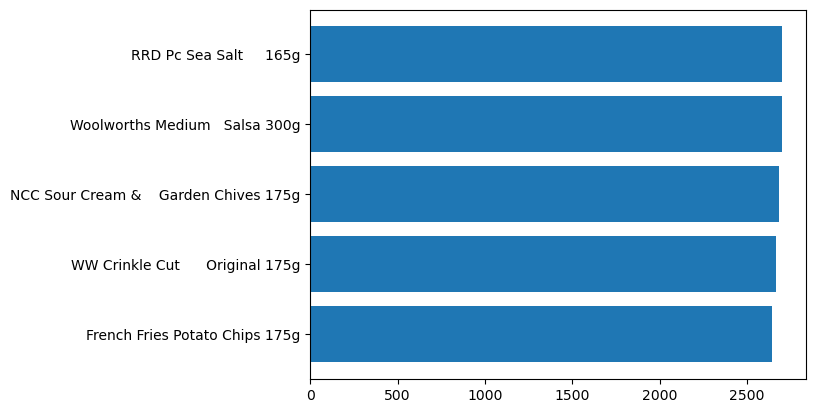

In [22]:
top5_sales = transaction.groupby('PROD_NAME')['PROD_QTY'].sum().reset_index(name = 'tot_sales').sort_values('tot_sales', ascending = True).head(5)
plt.barh(top5_sales['PROD_NAME'], top5_sales['tot_sales'])
plt.show()

In [23]:
merged_df = pd.merge(purchase, transaction, on = 'LYLTY_CARD_NBR', how = 'right')

In [25]:
merged_df['packet_weight'] = merged_df['PROD_NAME'].str.extract(r'(\d+)').astype('int')

In [70]:
merged_df.head(3)

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,packet_weight,packet_size
0,1000,YOUNG SINGLES/COUPLES,Premium,2018-10-17,1,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175,Medium
1,1307,MIDAGE SINGLES/COUPLES,Budget,2019-05-14,1,348,66,CCs Nacho Cheese 175g,3,6.3,175,Medium
2,1343,MIDAGE SINGLES/COUPLES,Budget,2019-05-20,1,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,170,Medium


In [27]:
merged_df['packet_weight'].count()

264836

In [28]:
merged_df['packet_weight'].unique()

array([175, 170, 150, 300, 330, 210, 270, 220, 125, 110, 134, 380, 180,
       165, 135, 250, 200, 160, 190,  90,  70])

In [29]:
merged_df['packet_weight'].describe()

count    264836.000000
mean        182.427004
std          64.327196
min          70.000000
25%         150.000000
50%         170.000000
75%         175.000000
max         380.000000
Name: packet_weight, dtype: float64

In [30]:
def size_structure(weight):
    if weight >= 250:
        return "Large"
    elif weight >= 150:
        return "Medium"
    else:
        return "Small"

merged_df['packet_size'] = merged_df['packet_weight'].apply(size_structure)

In [31]:
mean_cat_weight = merged_df.groupby('PREMIUM_CUSTOMER')['packet_weight'].mean().reset_index(name = 'mean_weight')

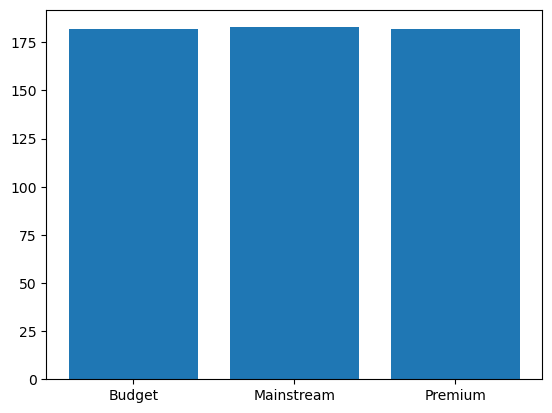

In [32]:
plt.bar(mean_cat_weight['PREMIUM_CUSTOMER'], mean_cat_weight['mean_weight'])
plt.show()

Mean weight of snack purchased by all segment of customers are uniformly distributed.

In [72]:
grouped_trans = merged_df.groupby('DATE')['TXN_ID'].count().reset_index(name = 'tot_trans')

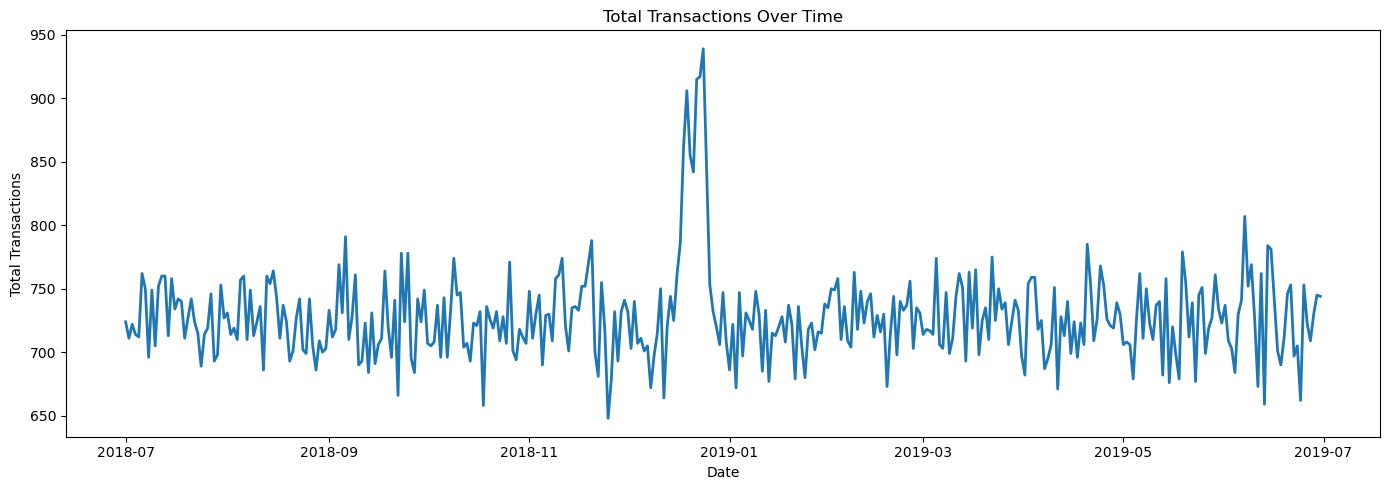

In [74]:
plt.figure(figsize=(14, 5))
plt.plot(grouped_trans["DATE"], grouped_trans["tot_trans"], linewidth=2)

plt.title("Total Transactions Over Time")
plt.xlabel("Date")
plt.ylabel("Total Transactions")

plt.tight_layout()
plt.show()

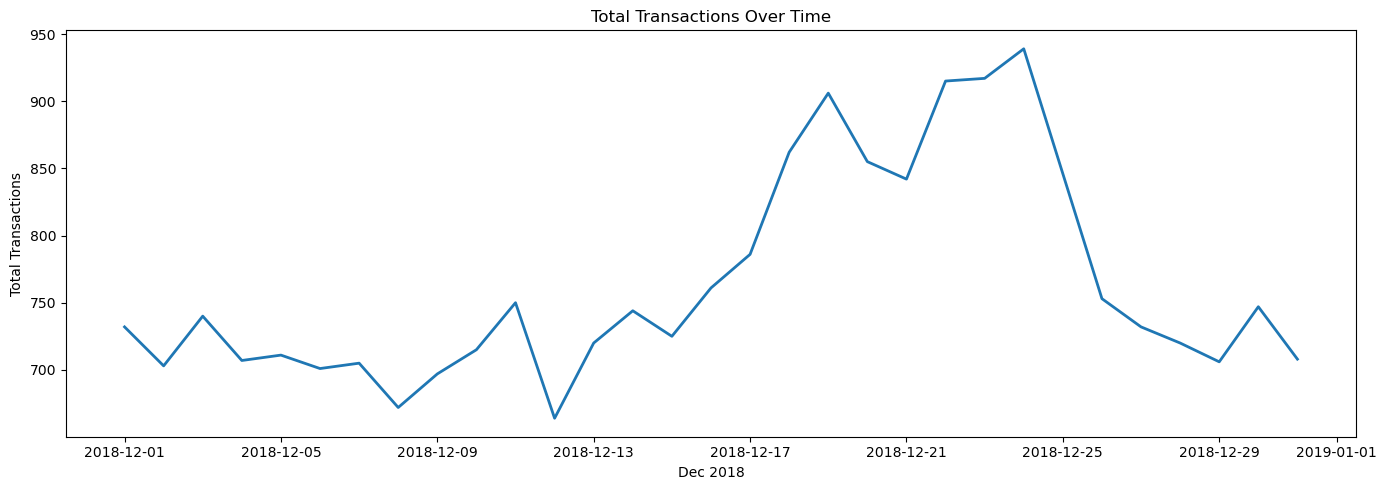

In [75]:
grouped_trans_ft = grouped_trans[(grouped_trans['DATE'] >= '2018-12-01') & (grouped_trans['DATE'] <= '2018-12-31')]
plt.figure(figsize=(14, 5))
plt.plot(grouped_trans_ft["DATE"], grouped_trans_ft["tot_trans"], linewidth=2)

plt.title("Total Transactions Over Time")
plt.xlabel("Dec 2018")
plt.ylabel("Total Transactions")

plt.tight_layout()
plt.show()

In [33]:
grouped_stage = merged_df.groupby('LIFESTAGE').agg(tot_purchased = ('TXN_ID', 'count'), tot_sales = ('TOT_SALES', 'sum')).reset_index().sort_values(['tot_purchased', 'tot_sales'], ascending = [False, False])
grouped_stage

,LIFESTAGE,tot_purchased,tot_sales
3,OLDER SINGLES/COUPLES,54479,402426.75
4,RETIREES,49763,366470.90
2,OLDER FAMILIES,48596,353767.20
5,YOUNG FAMILIES,43592,316160.10
6,YOUNG SINGLES/COUPLES,36377,260405.30
0,MIDAGE SINGLES/COUPLES,25110,184751.30
1,NEW FAMILIES,6919,50433.45


Older segments purchased the most snack (not sure of the reason), follows by the young segment. Midage and new families purchased the least snack.

In [34]:
grouped_segment = merged_df.groupby('PREMIUM_CUSTOMER').agg(tot_purchased = ('TXN_ID', 'count'), tot_sales = ('TOT_SALES', 'sum')).reset_index().sort_values(['tot_purchased', 'tot_sales'], ascending = [False, False])
grouped_segment

,PREMIUM_CUSTOMER,tot_purchased,tot_sales
1,Mainstream,101988,750744.50
0,Budget,93157,676211.55
2,Premium,69691,507458.95


In [35]:
top3_stage = merged_df.groupby(['LIFESTAGE', 'PROD_NAME'])['PROD_QTY'].sum().reset_index(name = 'tot_purchased').sort_values('tot_purchased', ascending = False)
top3_stage['rank'] = top3_stage.groupby('LIFESTAGE')['tot_purchased'].rank(method = 'dense', ascending = False)
top3_stage_ft = top3_stage[top3_stage['rank'] <= 3].sort_values(['LIFESTAGE', 'rank'], ascending = [True, True])
top3_stage_ft

,LIFESTAGE,PROD_NAME,tot_purchased,rank
29,MIDAGE SINGLES/COUPLES,Infzns Crn Crnchers Tangy Gcamole 110g,656,1.0
6,MIDAGE SINGLES/COUPLES,Cheezels Cheese 330g,640,2.0
101,MIDAGE SINGLES/COUPLES,Twisties Chicken270g,638,3.0
124,NEW FAMILIES,Cobs Popd Swt/Chlli &Sr/Cream Chips 110g,197,1.0
146,NEW FAMILIES,Kettle Honey Soy Chicken 175g,197,1.0
136,NEW FAMILIES,Grain Waves Sweet Chilli 210g,195,2.0
212,NEW FAMILIES,Tostitos Splash Of Lime 175g,191,3.0
239,OLDER FAMILIES,Dorito Corn Chp Supreme 380g,1441,1.0
305,OLDER FAMILIES,Smiths Crinkle Chips Salt & Vinegar 330g,1149,2.0
276,OLDER FAMILIES,Old El Paso Salsa Dip Chnky Tom Ht300g,1129,3.0


In [36]:
top3_segment = merged_df.groupby(['PREMIUM_CUSTOMER', 'PROD_NAME'])['PROD_QTY'].sum().reset_index(name = 'tot_purchased').sort_values('tot_purchased', ascending = False)
top3_segment['rank'] = top3_segment.groupby('PREMIUM_CUSTOMER')['tot_purchased'].rank(method = 'dense', ascending = False)
top3_segment_ft = top3_segment[top3_segment['rank'] <= 3].sort_values(['PREMIUM_CUSTOMER', 'rank'], ascending = [True, True])
top3_segment_ft

,PREMIUM_CUSTOMER,PROD_NAME,tot_purchased,rank
33,Budget,Kettle Mozzarella Basil & Pesto 175g,2267,1.0
14,Budget,Doritos Corn Chip Southern Chicken 150g,2182,2.0
15,Budget,Doritos Corn Chips Cheese Supreme 170g,2175,3.0
156,Mainstream,Kettle Tortilla ChpsHny&Jlpno Chili 150g,2611,1.0
124,Mainstream,Cobs Popd Swt/Chlli &Sr/Cream Chips 110g,2511,2.0
122,Mainstream,Cobs Popd Sea Salt Chips 110g,2502,3.0
239,Premium,Dorito Corn Chp Supreme 380g,2056,1.0
256,Premium,Infuzions Thai SweetChili PotatoMix 110g,1685,2.0
238,Premium,Cobs Popd Swt/Chlli &Sr/Cream Chips 110g,1662,3.0


In [59]:
avg_unit = merged_df.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER']).agg(tot_unit = ('PROD_QTY', 'sum'), tot_buyer = ('LYLTY_CARD_NBR', 'nunique')).reset_index()
avg_unit['avg_unit_trans'] = avg_unit['tot_unit']/avg_unit['tot_buyer'] 

In [60]:
avg_unit_wide = avg_unit.pivot(index = 'LIFESTAGE', columns = 'PREMIUM_CUSTOMER', values = 'avg_unit_trans').sort_index()
avg_unit_wide

PREMIUM_CUSTOMER,Budget,Mainstream,Premium
LIFESTAGE,,,
MIDAGE SINGLES/COUPLES,6.313830,6.796108,6.386672
NEW FAMILIES,5.009892,5.087161,5.028912
OLDER FAMILIES,9.639572,9.804309,9.749780
OLDER SINGLES/COUPLES,7.145466,7.098783,7.154947
RETIREES,6.458015,6.253743,6.426653
YOUNG FAMILIES,9.238486,9.180352,9.209207
YOUNG SINGLES/COUPLES,4.411485,4.776459,4.402098


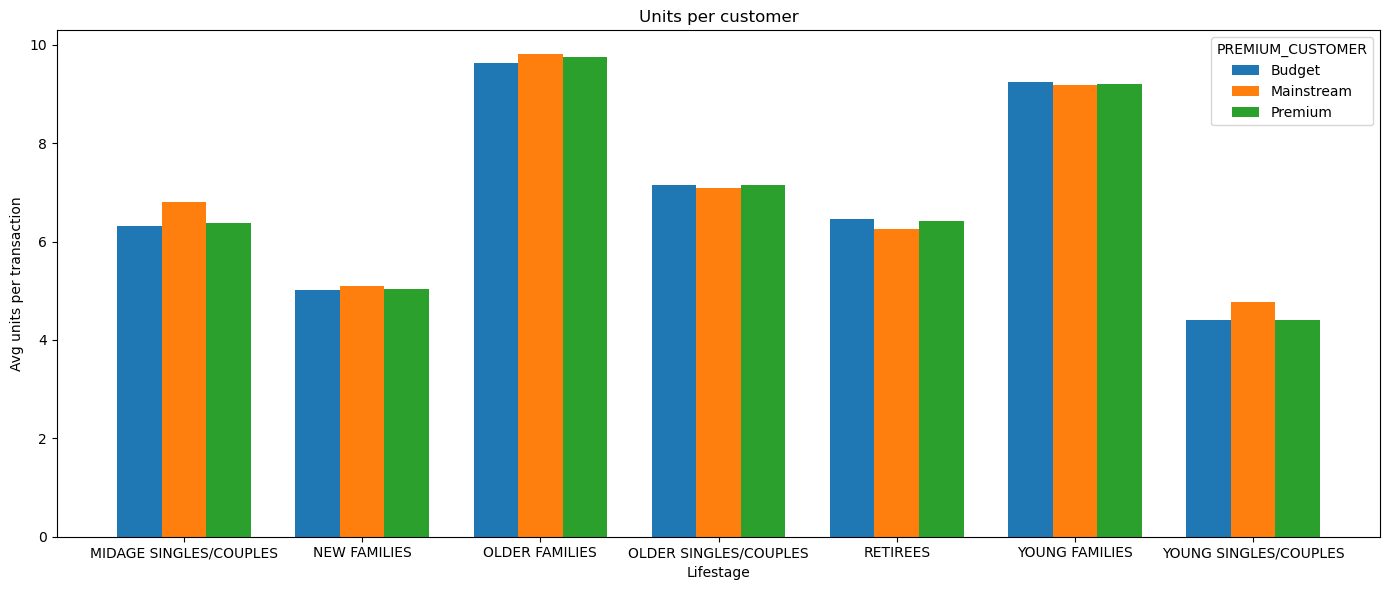

In [61]:
x = np.arange(len(avg_unit_wide.index))
width = 0.25

plt.figure(figsize=(14, 6))

plt.bar(x - width, avg_unit_wide["Budget"], width, label="Budget")
plt.bar(x, avg_unit_wide["Mainstream"], width, label="Mainstream")
plt.bar(x + width, avg_unit_wide["Premium"], width, label="Premium")

plt.title("Units per customer")
plt.xlabel("Lifestage")
plt.ylabel("Avg units per transaction")
plt.xticks(x, avg_unit_wide.index, rotation=0)
plt.legend(title="PREMIUM_CUSTOMER")

plt.tight_layout()
plt.show()

In [62]:
avg_price = merged_df.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER']).agg(tot_unit = ('PROD_QTY', 'sum'), tot_sales = ('TOT_SALES', 'sum')).reset_index()
avg_price['avg_price_unit'] = avg_price['tot_unit']/avg_price['tot_sales'] 

In [63]:
avg_price_wide = avg_price.pivot(index = 'LIFESTAGE', columns = 'PREMIUM_CUSTOMER', values = 'avg_price_unit').sort_index()
avg_price_wide

PREMIUM_CUSTOMER,Budget,Mainstream,Premium
LIFESTAGE,,,
MIDAGE SINGLES/COUPLES,0.267381,0.249978,0.265708
NEW FAMILIES,0.254054,0.253851,0.257330
OLDER FAMILIES,0.267665,0.268315,0.270515
OLDER SINGLES/COUPLES,0.257513,0.262359,0.256957
RETIREES,0.254216,0.260270,0.254839
YOUNG FAMILIES,0.266323,0.269903,0.266657
YOUNG SINGLES/COUPLES,0.272662,0.245093,0.272104


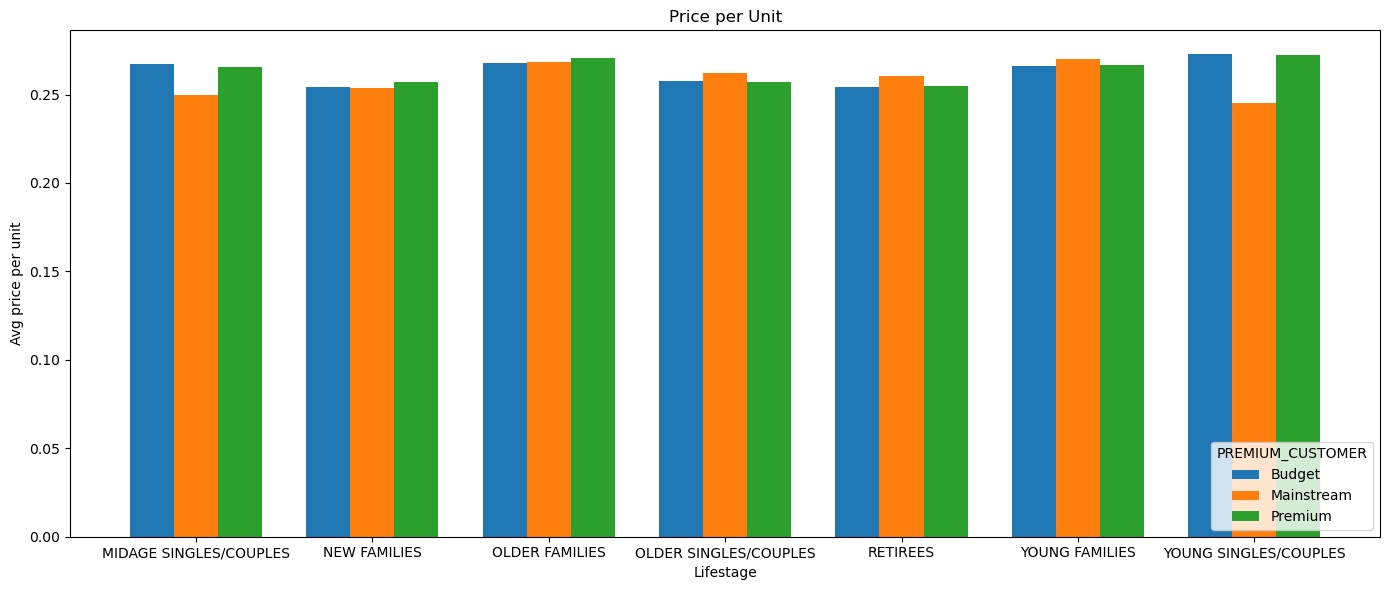

In [65]:
x = np.arange(len(avg_price_wide.index))
width = 0.25

plt.figure(figsize=(14, 6))

plt.bar(x - width, avg_price_wide["Budget"], width, label="Budget")
plt.bar(x, avg_price_wide["Mainstream"], width, label="Mainstream")
plt.bar(x + width, avg_price_wide["Premium"], width, label="Premium")

plt.title("Price per Unit")
plt.xlabel("Lifestage")
plt.ylabel("Avg price per unit")
plt.xticks(x, avg_unit_wide.index, rotation=0)
plt.legend(title="PREMIUM_CUSTOMER", loc='lower right')

plt.tight_layout()
plt.show()